In [118]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [119]:
# set input feature number 
NUM_FEATURES = 2
# set example number
NUM_EXAMPLES = 1000
# set batch size
BATCH_SZ = 10
# set learning rate
LEARNING_RATE = 1e-3
# set epochs
EPOCHS = 50


In [120]:
# set true weight and bias in order to generate corresponded label
TRUE_W = [2, -3.4]
TRUE_B = 4.2

In [121]:
features = torch.randn(NUM_EXAMPLES, NUM_FEATURES, dtype=torch.float32)
features.shape
features[0:2]
labels = TRUE_W[0] * features[:, 0] + TRUE_W[1] * features[:, 1] + TRUE_B
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
labels.shape
labels[0:2]

torch.Size([1000, 2])

tensor([[-0.7627, -0.4761],
        [-0.4667,  2.2747]])

torch.Size([1000])

tensor([ 4.3018, -4.4658])

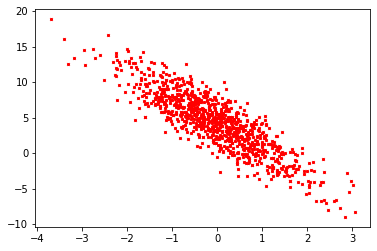

In [122]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 6, c='r', marker='x');

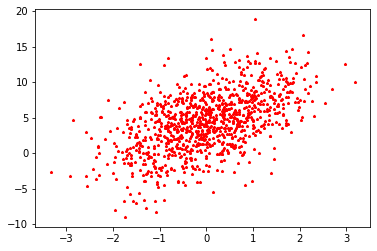

In [123]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 6, c='r', marker='*');

In [124]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [125]:
# for X, y in data_iter(BATCH_SZ, features, labels):
#     print(X, '\n', y)
#     break


In [126]:
w = torch.tensor(np.random.normal(0, 0.03, (NUM_FEATURES, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
w
b

tensor([[-0.0569],
        [-0.0105]], requires_grad=True)

tensor([0.], requires_grad=True)

In [127]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [128]:
def squared_loss(y_hat, y): 
    return (y_hat - y.view(y_hat.size())) ** 2 / 2.

In [129]:
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size # ues .data to operate param without gradient track

In [130]:
network = linreg
loss = squared_loss

In [131]:
for epoch in range(EPOCHS):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once
    
    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(BATCH_SZ, features, labels):
        l = loss(network(X, w, b), y).sum()  
        
        # calculate the gradient of batch sample loss 
        l.backward()  
        # using small batch random gradient descent to iter model parameters
        sgd([w, b], LEARNING_RATE, BATCH_SZ)  
        # reset parameter gradient
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(network(features, w, b), labels)
    print('epoch:', epoch, '==>loss:',train_l.mean().item())

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 0 ==>loss: 14.478560447692871


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 1 ==>loss: 11.667496681213379


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 2 ==>loss: 9.403002738952637


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 3 ==>loss: 7.578769207000732


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 4 ==>loss: 6.108963966369629


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 5 ==>loss: 4.924654960632324


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 6 ==>loss: 3.970329523086548


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 7 ==>loss: 3.201239824295044


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 8 ==>loss: 2.581387519836426


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 9 ==>loss: 2.081761121749878


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 10 ==>loss: 1.6790013313293457


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 11 ==>loss: 1.3543108701705933


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 12 ==>loss: 1.092522144317627


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 13 ==>loss: 0.881435751914978


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 14 ==>loss: 0.711212158203125


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 15 ==>loss: 0.5739211440086365


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 16 ==>loss: 0.46318382024765015


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 17 ==>loss: 0.3738563358783722


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 18 ==>loss: 0.30179476737976074


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 19 ==>loss: 0.24365024268627167


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 20 ==>loss: 0.19673193991184235


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 21 ==>loss: 0.15886981785297394


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 22 ==>loss: 0.1283109039068222


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 23 ==>loss: 0.10364456474781036


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 24 ==>loss: 0.08373203873634338


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 25 ==>loss: 0.06765512377023697


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 26 ==>loss: 0.05467338487505913


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 27 ==>loss: 0.044190142303705215


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 28 ==>loss: 0.035722766071558


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 29 ==>loss: 0.028884282335639


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 30 ==>loss: 0.023358920589089394


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 31 ==>loss: 0.018895497545599937


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 32 ==>loss: 0.015288462862372398


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 33 ==>loss: 0.012372985482215881


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 34 ==>loss: 0.010016690008342266


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 35 ==>loss: 0.008111911825835705


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 36 ==>loss: 0.006572301033884287


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 37 ==>loss: 0.005327341612428427


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 38 ==>loss: 0.004320446867495775


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 39 ==>loss: 0.003505937522277236


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 40 ==>loss: 0.002847337396815419


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 41 ==>loss: 0.0023144083097577095


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 42 ==>loss: 0.0018831937341019511


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 43 ==>loss: 0.001534301438368857


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 44 ==>loss: 0.0012520416639745235


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 45 ==>loss: 0.0010233093053102493


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 46 ==>loss: 0.0008382477099075913


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 47 ==>loss: 0.0006882714224047959


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 48 ==>loss: 0.0005669704405590892


tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

tensor([[0.],
        [0.]])

tensor([0.])

epoch: 49 ==>loss: 0.0004686381435021758


In [132]:
w, TRUE_W
b, TRUE_B

(tensor([[ 1.9912],
         [-3.3901]], requires_grad=True),
 [2, -3.4])

(tensor([4.1755], requires_grad=True), 4.2)